In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import time

In [3]:
items = pd.read_csv('C:/Users/Hassan Ali/Desktop/Data Mining Cup/items.csv', sep = '|')
transactions = pd.read_csv('C:/Users/Hassan Ali/Desktop/Data Mining Cup/transactions.csv', sep = '|')
itemsC = pd.read_csv('C:/Users/Hassan Ali/Desktop/Data Mining Cup/items_cleaned.csv', encoding = 'latin-1')
transactionsC = pd.read_csv('C:/Users/Hassan Ali/Desktop/Data Mining Cup/transactions_cleaned.csv')

In [9]:
pd.set_option('display.max_rows', 10)

*transactions dataframe*

In [91]:
print('\nDataframe \'transactions\' (Number of unique values in each column)')
print('Shape: ', transactions.shape)
print('(Number of unique values in each column)')
print(transactions.nunique())

# Session IDs range from number 0 to 279354; given in ascending order


Dataframe 'transactions' (Number of unique values in each column)
Shape:  (365143, 5)
(Number of unique values in each column)
sessionID    271983
itemID        24909
click            32
basket           45
order            23
dtype: int64




In [94]:
print('\nDataframe \'transactions_cleaned\' (Number of unique values in each column)')
print('Shape: ', transactionsC.shape)
print('(Number of unique values in each column)')
print(transactionsC.nunique())


Dataframe 'transactions_cleaned' (Number of unique values in each column)
Shape:  (365143, 5)
(Number of unique values in each column)
sessionID    271983
itemID        23762
click            32
basket           45
order            23
dtype: int64


In [97]:
transactionsC[['click','basket','order']].describe()
print(transactionsC[['click','basket','order']].describe().to_latex(float_format="%.2f"))

\begin{tabular}{lrrr}
\toprule
{} &     click &    basket &     order \\
\midrule
count & 365143.00 & 365143.00 & 365143.00 \\
mean  &      1.23 &      0.14 &      0.05 \\
std   &      1.07 &      1.11 &      0.27 \\
min   &      0.00 &      0.00 &      0.00 \\
25\%   &      1.00 &      0.00 &      0.00 \\
50\%   &      1.00 &      0.00 &      0.00 \\
75\%   &      1.00 &      0.00 &      0.00 \\
max   &    118.00 &    293.00 &     28.00 \\
\bottomrule
\end{tabular}



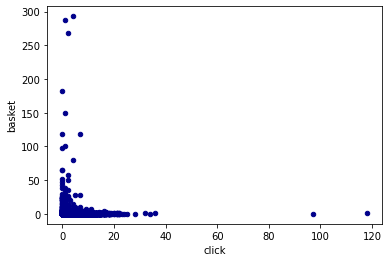

In [109]:
ax = transactionsC[['click','basket','order']].plot.scatter(x='click',y='basket',c='DarkBlue')
fig = ax.get_figure()
fig.savefig('t1.jpg')

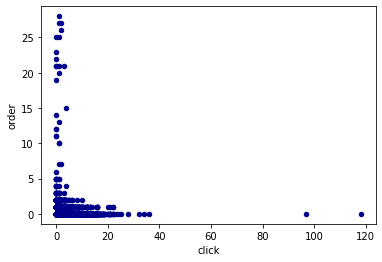

In [110]:
ax = transactionsC[['click','basket','order']].plot.scatter(x='click',y='order',c='DarkBlue')
fig = ax.get_figure()
fig.savefig('t2.jpg')

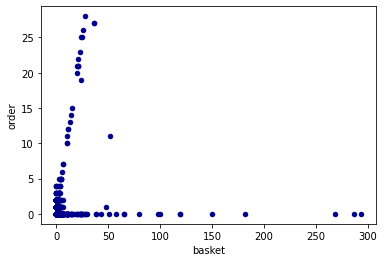

In [111]:
ax = transactionsC[['click','basket','order']].plot.scatter(x='basket',y='order',c='DarkBlue')
fig = ax.get_figure()
fig.savefig('t3.jpg')

In [108]:
print('Number of rows with 1 or more clicks: ', len(transactionsC[transactionsC['click']>0]))
print('Number of rows with 1 or more baskets: ', len(transactionsC[transactionsC['basket']>0]))
print('Number of rows with 1 or more orders: ', len(transactionsC[transactionsC['order']>0]))

print('\nPercentage of rows with 1 or more clicks: ', len(transactionsC[transactionsC['click']>0])*100/len(transactionsC))
print('Percentage of rows with 1 or more baskets: ', len(transactionsC[transactionsC['basket']>0])*100/len(transactionsC))
print('Percentage of rows with 1 or more orders: ', len(transactionsC[transactionsC['order']>0])*100/len(transactionsC))

Number of rows with 1 or more clicks:  341595
Number of rows with 1 or more baskets:  44988
Number of rows with 1 or more orders:  16906

Percentage of rows with 1 or more clicks:  93.55101973747271
Percentage of rows with 1 or more baskets:  12.320652456708741
Percentage of rows with 1 or more orders:  4.629966889684315


In [109]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

cont_table = pd.crosstab(index=transactionsC['click'],
                           columns=transactionsC['basket'], margins=True)
cont_table/(365143/100)

basket,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,20,21,22,23,24,25,26,28,29,30,36,38,43,48,51,52,58,65,80,98,100,119,150,182,268,287,293,All
click,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.368269,2.938849,0.118036,0.006025,0.004108,0.001643,0.002191,0.000822,0.000000,0.000548,0.001095,0.000548,0.000000,0.000000,0.000274,0.000274,0.000274,0.000274,0.000548,0.000548,0.000000,0.000274,0.001095,0.000274,0.000274,0.000000,0.000274,0.000000,0.000000,0.000274,0.000274,0.000274,0.000000,0.000274,0.000000,0.000548,0.000000,0.000274,0.000000,0.000274,0.000000,0.000274,0.000000,0.000000,0.000000,6.448980
1,73.281974,5.512087,0.178560,0.013693,0.003834,0.002465,0.000274,0.001369,0.000822,0.000000,0.001369,0.000274,0.000274,0.000274,0.001095,0.000000,0.000000,0.000000,0.000822,0.000274,0.000274,0.000548,0.000274,0.000274,0.000000,0.000274,0.000000,0.000274,0.000274,0.000274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000274,0.000000,0.000274,0.000000,0.000000,0.000274,0.000000,79.002747
2,6.117603,1.651956,0.158842,0.014241,0.002465,0.000548,0.000548,0.001369,0.000000,0.000274,0.000274,0.000822,0.000000,0.000000,0.000000,0.000274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000274,0.000000,0.000274,0.000274,0.000000,0.000000,0.000000,0.000274,0.000000,0.000000,0.000000,0.000274,0.000000,0.000274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000274,0.000000,0.000000,7.951131
3,2.489436,0.718623,0.070110,0.013419,0.001369,0.000548,0.000274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.294052
4,0.956885,0.307277,0.045462,0.012598,0.002191,0.000274,0.000000,0.000000,0.000000,0.000000,0.000274,0.000000,0.000000,0.000000,0.000000,0.000274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000274,1.325782
5,0.615923,0.156377,0.020814,0.004656,0.001643,0.000822,0.000000,0.000000,0.000000,0.000274,0.000274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.801056
6,0.307277,0.094210,0.012598,0.004382,0.001369,0.000274,0.000274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.420383
7,0.222652,0.061346,0.010955,0.001369,0.000274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000274,0.000000,0.000000,0.000000,0.000000,0.000000,0.297418
8,0.114476,0.040806,0.006299,0.001643,0.000548,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.163771


In [110]:
cont_table = pd.crosstab(index=transactionsC['click'],
                           columns=transactionsC['order'], margins=True)
cont_table/(365143/100)

order,0,1,2,3,4,5,6,7,10,11,12,13,14,15,19,20,21,22,23,25,26,27,28,All
click,,,,,,,,,,,,,,,,,,,,,,,,
0,2.852033,3.539161,0.049022,0.002739,0.001369,0.001369,0.000274,0.000000,0.000000,0.000548,0.000548,0.000000,0.000274,0.000000,0.000274,0.000000,0.000548,0.000274,0.000274,0.000274,0.000000,0.000000,0.000000,6.448980
1,78.378334,0.610720,0.008490,0.001917,0.000274,0.000548,0.000000,0.000274,0.000548,0.000000,0.000000,0.000274,0.000000,0.000000,0.000000,0.000274,0.000274,0.000000,0.000000,0.000274,0.000000,0.000274,0.000274,79.002747
2,7.741351,0.203482,0.005477,0.000000,0.000000,0.000000,0.000000,0.000274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000274,0.000274,0.000000,7.951131
3,3.202581,0.087637,0.003286,0.000274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.294052
4,1.280594,0.043271,0.001369,0.000000,0.000274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.325782
5,0.779968,0.020266,0.000822,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.801056
6,0.404499,0.015063,0.000822,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.420383
7,0.290023,0.007394,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.297418
8,0.159390,0.004108,0.000274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.163771


In [111]:
cont_table = pd.crosstab(index=transactionsC['basket'],
                           columns=transactionsC['order'], margins=True)
cont_table/(365143/100)

order,0,1,2,3,4,5,6,7,10,11,12,13,14,15,19,20,21,22,23,25,26,27,28,All
basket,,,,,,,,,,,,,,,,,,,,,,,,
0,84.289169,3.343074,0.044914,0.001369,0.000822,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,87.679348
1,10.470418,1.083959,0.000822,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.555199
2,0.518153,0.093662,0.021361,0.000548,0.000274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.633998
3,0.051213,0.019171,0.001369,0.002739,0.000000,0.000274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.074765
4,0.013146,0.002739,0.000548,0.000274,0.000822,0.000548,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018075
5,0.004656,0.000548,0.000548,0.000000,0.000000,0.001095,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006847
6,0.002739,0.000548,0.000000,0.000000,0.000000,0.000000,0.000274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003560
7,0.002739,0.000274,0.000274,0.000000,0.000000,0.000000,0.000000,0.000548,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003834
8,0.001095,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001095


In [10]:
transactionsC[transactionsC['click']>0][['itemID','click']].groupby('itemID').sum().sort_values('click', ascending=False)

,click
itemID,
58522,3229
10666,2218
44220,2204
66247,2194
40692,2020
...,...
53863,1
21365,1
8752,1


In [11]:
transactionsC[transactionsC['basket']>0][['itemID','basket']].groupby('itemID').sum().sort_values('basket', ascending=False)

,basket
itemID,
5027,597
23654,408
47120,371
21033,316
19379,278
...,...
38423,1
13,1
38565,1


In [34]:
transactionsC[transactionsC['order']>0][['itemID','order']].groupby('itemID').sum().sort_values('order', ascending=False)

,order
itemID,
53695,170
69803,125
47120,122
31591,95
45799,93
...,...
34157,1
34201,1
34235,1


In [48]:
itemsC[itemsC['itemID']==69803]['description'].iloc[0]

'Faschistoides Denken und Handeln ist immer noch und überall vorhanden. Ein Lehrer beweist es seinen Schülern in einem aufsehenerregenden Experiment.'

In [29]:
pd.set_option('display.max_rows', 20)

In [40]:
print('Total clicks: ',transactionsC['click'].sum())
print('Total baskets: ',transactionsC['basket'].sum())
print('Total sales: ',transactionsC['order'].sum())

Total clicks:  450287
Total baskets:  51559
Total sales:  17674


In [6]:
# number of item IDs in each session
items_looked_at = transactionsC.groupby("sessionID").size()
print("Unique SessionIDs: ", len(items_looked_at))
print("Items looked at in one session")
print("max: ", items_looked_at.max(), "\nmin: ", items_looked_at.min(),
      "\nmean: ", items_looked_at.mean(),
     "\nmedian: ", items_looked_at.median())

Unique SessionIDs:  271983
Items looked at in one session
max:  213 
min:  1 
mean:  1.3425214075879743 
median:  1.0


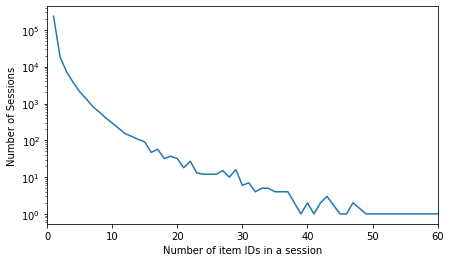

In [4]:
# OBSOLETE
fig = plt.figure(figsize=(7,4))
items_looked_at_size = pd.DataFrame(items_looked_at)
items_looked_at_size.groupby(0).size().plot(logy=True)
plt.xlim(0, 60)
plt.xlabel('Number of item IDs in a session')
plt.ylabel('Number of Sessions')
fig.savefig('t4.jpg', bbox_inches='tight', dpi=1000)

In [16]:
items_looked_at_size = pd.DataFrame(items_looked_at, columns=['sessionID'])

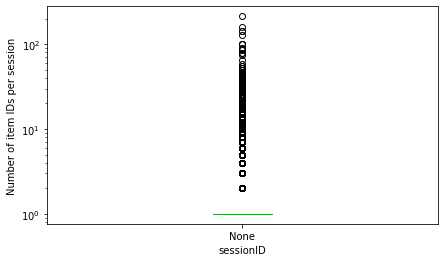

In [23]:
fig = plt.figure(figsize=(7,4))
items_looked_at.plot(kind='box')
plt.xlabel('sessionID')
plt.ylabel('Number of item IDs per session')
plt.yscale("log")
fig.savefig('t4.jpg', bbox_inches='tight', dpi=1000)